      Class                                         path  tag
0      rose   D:\Lab Python\Lab_1\dataset\ rose\0001.jpg    0
1      rose   D:\Lab Python\Lab_1\dataset\ rose\0002.jpg    0
2      rose   D:\Lab Python\Lab_1\dataset\ rose\0003.jpg    0
3      rose   D:\Lab Python\Lab_1\dataset\ rose\0004.jpg    0
4      rose   D:\Lab Python\Lab_1\dataset\ rose\0005.jpg    0
...     ...                                          ...  ...
2311  tulip  D:\Lab Python\Lab_1\dataset\ tulip\1164.jpg    1
2312  tulip  D:\Lab Python\Lab_1\dataset\ tulip\1165.jpg    1
2313  tulip  D:\Lab Python\Lab_1\dataset\ tulip\1166.jpg    1
2314  tulip  D:\Lab Python\Lab_1\dataset\ tulip\1167.jpg    1
2315  tulip  D:\Lab Python\Lab_1\dataset\ tulip\1168.jpg    1

[2316 rows x 3 columns]
      Class                                         path  tag  width  height  \
0      rose   D:\Lab Python\Lab_1\dataset\ rose\0001.jpg    0    320     427   
1      rose   D:\Lab Python\Lab_1\dataset\ rose\0002.jpg    0    320   

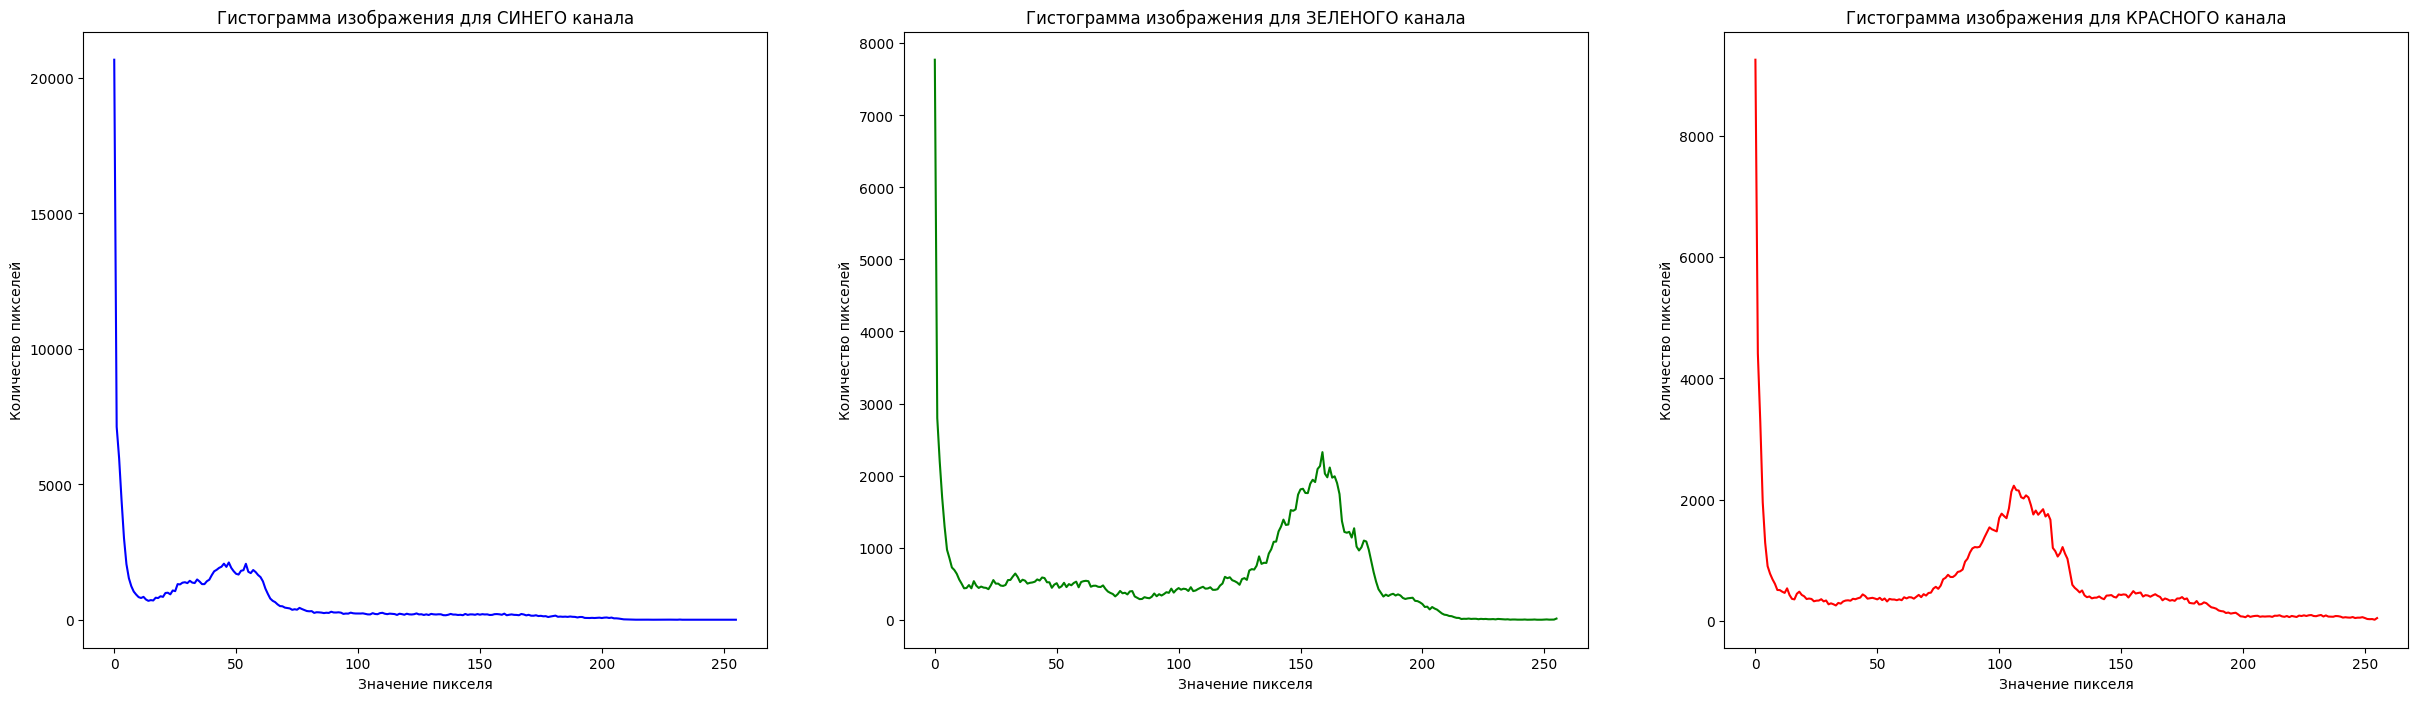

In [4]:
import pandas as pd
import os 
import cv2
import numpy as np
from statistics import mean
import matplotlib.pyplot as plt
import random

def data_frame(data_frame: pd.DataFrame, directory_obj: str, name: str) -> pd.DataFrame:
    """Сreates a dataframe specifying the path and class label.
    Args:
        data_frame (pd.DataFrame): the original dataframe.
        directory_obj (str): the path of the source folder.
        name (str): object class.
    Returns:
        pd.DataFrame: dataframe with class paths and labels.
    """    
    data = os.listdir(directory_obj)
    
    if data_frame.empty:
        count = 0
    else: 
        data_list = data_frame["Class"].tolist()
        data_list = list(set(data_list))
        count = len(data_list) 
            
    for i in data:
        path = f"{directory_obj}\{i}"
        data_frame2 = pd.DataFrame({"Class": name, "path": [path], "tag": count})
        data_frame = pd.concat([data_frame, data_frame2], ignore_index = True)

    return data_frame
    
def dimension(data_frame: pd.DataFrame) -> pd.DataFrame:
    """Adds the width height and depth of the image to the dataframe.
    Args:
        data_frame (pd.DataFrame): the original dataframe.
    Returns:
        pd.DataFrame: dataframe with width height and depth of images.
    """    
    width_list = []
    height_list = []
    channels_list = []
    
    for i in data_frame.path: 
        img = cv2.imread(i)
        width_list.append(img.shape[0])
        height_list.append(img.shape[1])
        channels_list.append(img.shape[2])
    
    data_frame["width"] = pd.Series(width_list)
    data_frame["height"] = pd.Series(height_list)
    data_frame["channels"] = pd.Series(channels_list)
    
    print(data_frame)
    return data_frame
        
def stat(data_frame: pd.DataFrame) -> None:
    """Displays statistics on the dataframe.
    Args:
        data_frame (pd.DataFrame): the original dataframe.
    """    
    print(data_frame.describe())    
    if data_frame.tag.mean() == 0.5:
        print("Набор является сбалансированным\n")
    else: 
        print("Набор не является сбалансированным\n")   
 
def filter_tag(data_frame: pd.DataFrame, class_tag: int) -> pd.DataFrame:
    """Creates a dataframe based on a numeric class label.
    Args:
        data_frame (pd.DataFrame): the original dataframe.
        class_tag (int): numeric class label.
    Returns:
        pd.DataFrame: dataframe with a specific numeric class label.
    """      
    data_frame2 = pd.DataFrame()
    data_frame2 = data_frame[data_frame.tag == class_tag]
    print(data_frame2)    
    return data_frame2

def filter_dimensions(data_frame: pd.DataFrame, class_tag: int, max_height: int, max_width: int) -> pd.DataFrame:
    """Filters the dataframe by the width and height of the image
    Args:
        data_frame (pd.DataFrame): the original dataframe.
        class_tag (int): numeric class label.
        max_height (int): height border.
        max_width (int): width border.
    Returns:
        pd.DataFrame: dataframe with the width and height of images in the range.
    """    
    data_frame2 = pd.DataFrame()
    data_frame2 = data_frame[(data_frame.tag == class_tag) & (data_frame.width <= max_width) & (data_frame.height <= max_height)]
    print(data_frame2)
    return data_frame2

pd.options.mode.chained_assignment = None

def pixel(data_frame: pd.DataFrame, class_tag: int) -> pd.DataFrame:
    """Сalculates the maximum, minimum, average pixel values for all images.
    Args:
        data_frame (pd.DataFrame): the original dataframe.
        class_tag (int): numeric class label.
    Returns:
        pd.DataFrame: dataframe with maximum minimum and average pixel values across all images.
    """    
    data_frame2 = pd.DataFrame()
    data_frame2 = data_frame[data_frame.tag == class_tag]
    
    sum_list = []
    sum = 0
    
    for i in data_frame2.path:
        img = cv2.imread(i)
        sum += np.sum(img == 255)
        sum_list.append(sum)
    
    # data_frame2["min"] = pd.Series(min(sum_list))
    # data_frame2["max"] = pd.Series()
    # data_frame2["average"] = pd.Series(mean(sum_list)) 

    data_frame2.loc[:, "min"] = min(sum_list)
    data_frame2.loc[:, "max"] = max(sum_list)
    data_frame2.loc[:, "average"] = np.average(sum_list)
    print(data_frame2)
    return data_frame2

def hist(data_frame: pd.DataFrame, class_tag: int) -> np.ndarray:
    """Сalculates a histogram for RGB.
    Args:
        data_frame (pd.DataFrame): the original dataframe.
        class_tag (int): numeric class label.
    Returns:
        np.ndarray: histograms by RGB colors.
    """    
    data_frame = data_frame[data_frame.tag == class_tag]
    
    path_list = []
    
    for i in data_frame.path:
        path_list.append(i)
    
    random.shuffle(path_list)
    
    img = cv2.imread(path_list[0])
    print(path_list[0])
    hist_b = cv2.calcHist([img], [0], None, [256], [0, 256])
    hist_g = cv2.calcHist([img], [1], None, [256], [0, 256])
    hist_r = cv2.calcHist([img], [2], None, [256], [0, 256])
    return hist_b, hist_g, hist_r

def output_hist(hist_b: np.ndarray, hist_g: np.ndarray, hist_r: np.ndarray) -> None:
    """Displays histograms.
    Args:
        hist_b (np.ndarray): blue histogram.
        hist_g (np.ndarray): green histogram.
        hist_r (np.ndarray): red histogram.
    """    
    fig = plt.figure(figsize = (30, 8))
    
    fig.add_subplot(1, 3, 1)
    plt.plot(hist_b, color = "b")
    plt.title("Гистограмма изображения для СИНЕГО канала")
    plt.ylabel("Количество пикселей")
    plt.xlabel("Значение пикселя")
    
    fig.add_subplot(1, 3, 2)
    plt.plot(hist_g, color = "g")
    plt.title("Гистограмма изображения для ЗЕЛЕНОГО канала")
    plt.ylabel("Количество пикселей")
    plt.xlabel("Значение пикселя")
    
    fig.add_subplot(1, 3, 3)
    plt.plot(hist_r, color = "r")
    plt.title("Гистограмма изображения для КРАСНОГО канала")
    plt.ylabel("Количество пикселей")
    plt.xlabel("Значение пикселя")
    
    plt.show()
          
def main():
    """Separates code blocks."""
    df = pd.DataFrame()
    
    df = data_frame(df, "D:\Lab Python\Lab_1\dataset\ rose", "rose")
    df = data_frame(df, "D:\Lab Python\Lab_1\dataset\ tulip", "tulip")
    print(df)
    
    df = dimension(df)

    stat(df)
    
    df2 = pd.DataFrame()
    df2 = filter_tag(df, 5)
    
    df3 = pd.DataFrame()
    df3 = filter_dimensions(df, 0, 300, 460)
    
    df4 = pd.DataFrame() 
    df4 = pixel(df, 0)
    
    b, g, r = hist(df, 0)
    output_hist(b, g, r)
    
if __name__ == "__main__":
	main()  
 
 # D:\Lab Python\Lab_1\dataset\ rose
 # D:\Lab Python\Lab_1\dataset\ tulip